# Analysis of MASK-rCNN Results

Analysing the resulting masks from tests based on the Mask-rCNN model trained on ALICE images. See file _ALICE_rCNN_Testing.ipynb_.

#### Imports

In [44]:
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import random
import skimage.io
import numpy as np

#### Files

In [13]:
good_plots = []
bad_plots = []

for file in os.listdir('results//plots//good'):
    good_plots.append(file)
    
for file in os.listdir('results//plots//all'):
    if file not in good_plots:
        bad_plots.append(file)
        
print("Found "+str(len(good_plots))+" good plots.")
print("Found "+str(len(bad_plots))+" bad plots.")

prct = 100*round(len(good_plots)/(len(bad_plots)+len(good_plots)),3)

print("Success rate: "+str(prct)+"%")

Found 121 good plots.
Found 44 bad plots.
Success rate: 73.3%


## Good Masks

### General Overview

In [28]:
good_random = random.choices(good_plots,k=20)

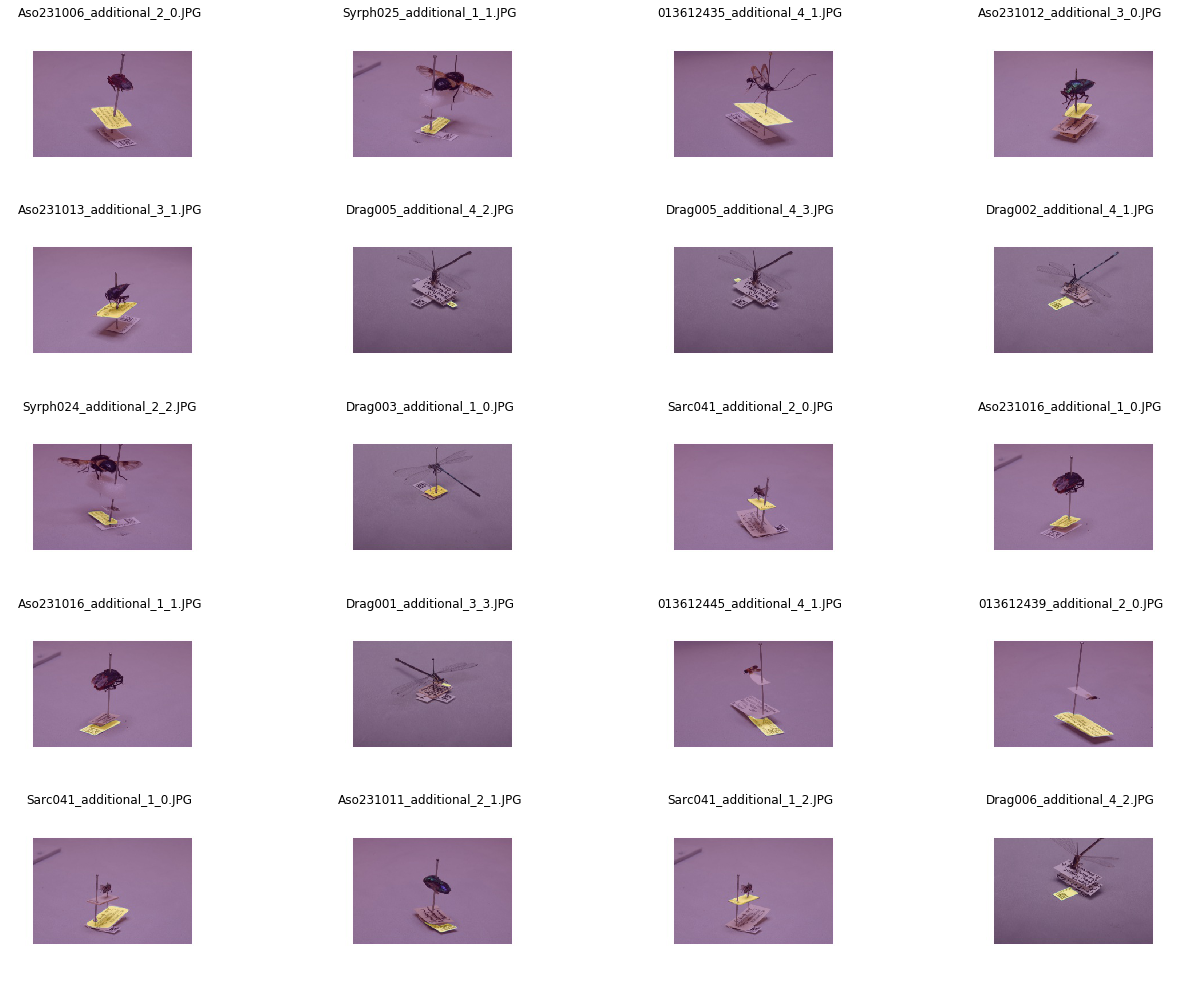

In [29]:
a = 5
b = 4
fig,ax = plt.subplots(a,b,figsize=(b*5.5,a*3.5))
j = 0
for i_,nm in enumerate(good_random):
    i = i_%a
    if (i == 0) and (i_ != 0):
        j = j+1
    image = skimage.io.imread('results//plots//all/'+nm)
    ax[i,j].imshow(image)
    ax[i,j].axis('off')
    ax[i,j].set_title(nm)        

### Individual Specimen - Example #1

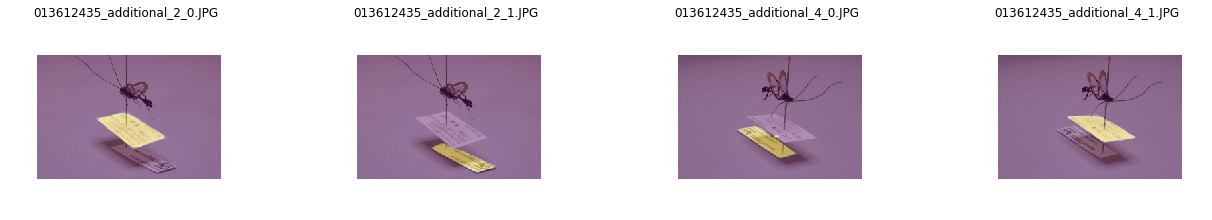

In [38]:
name = '013612435'
example_files = [nm for nm in good_plots if name in nm]
n = len(example_files)
fig,ax = plt.subplots(1,n,figsize=(n*5.5,3.5))
for i,nm in enumerate(example_files):
    image = skimage.io.imread('results//plots//all/'+nm)
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title(nm)    

### Individual Specimen - Example #2

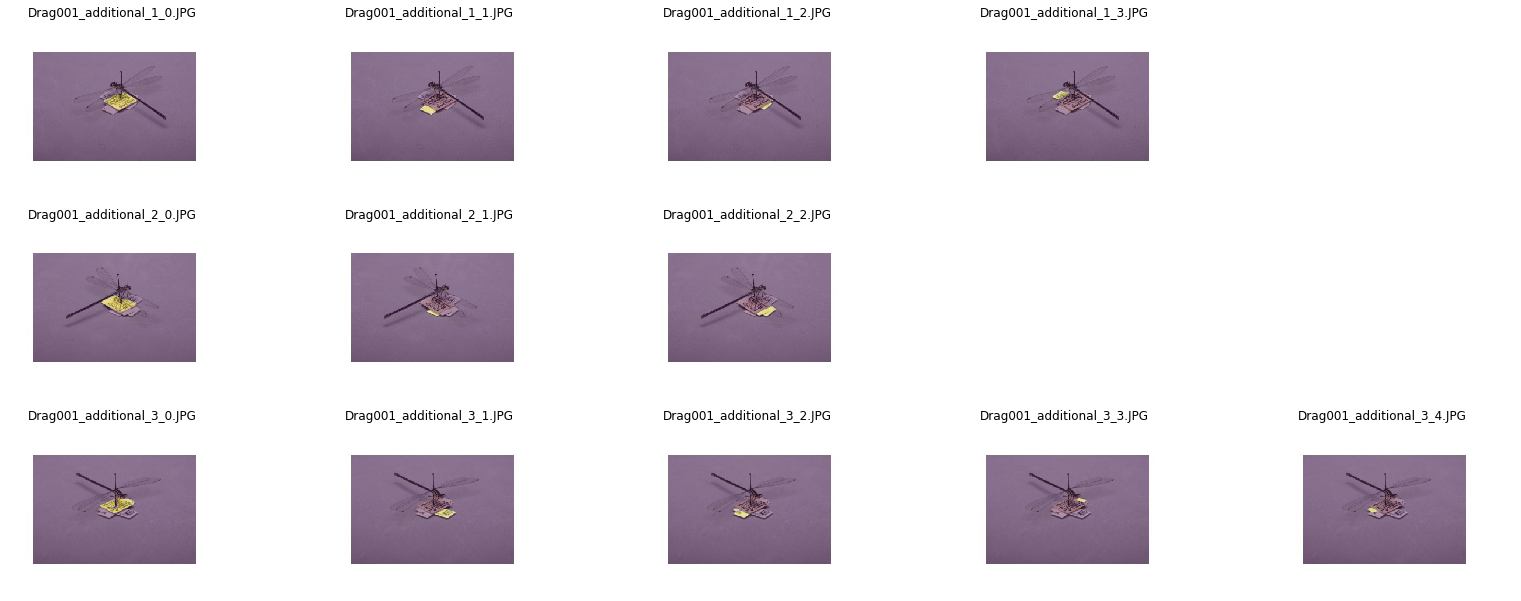

In [55]:
name = 'Drag001'
example_files_all = [nm for nm in good_plots if name in nm]
unq_images = np.unique([nm[:-6] for nm in example_files_all])
k = max([len([nm for nm in example_files_all if unq in nm]) for unq in unq_images])
a = len(unq_images)

fig,ax = plt.subplots(a,k,figsize=(k*5.5,a*3.5))

for i,unq in enumerate(unq_images):
    files_ = [nm for nm in example_files_all if unq in nm]
    for j,nm in enumerate(files_):
        image = skimage.io.imread('results//plots//all/'+nm)
        ax[i,j].imshow(image)
        ax[i,j].axis('off')
        ax[i,j].set_title(nm)    
    if j<k:
        for t in range(j,k):
            ax[i,t].axis('off')

## Bad Masks

### General Overview

In [56]:
bad_random = random.choices(bad_plots,k=8)

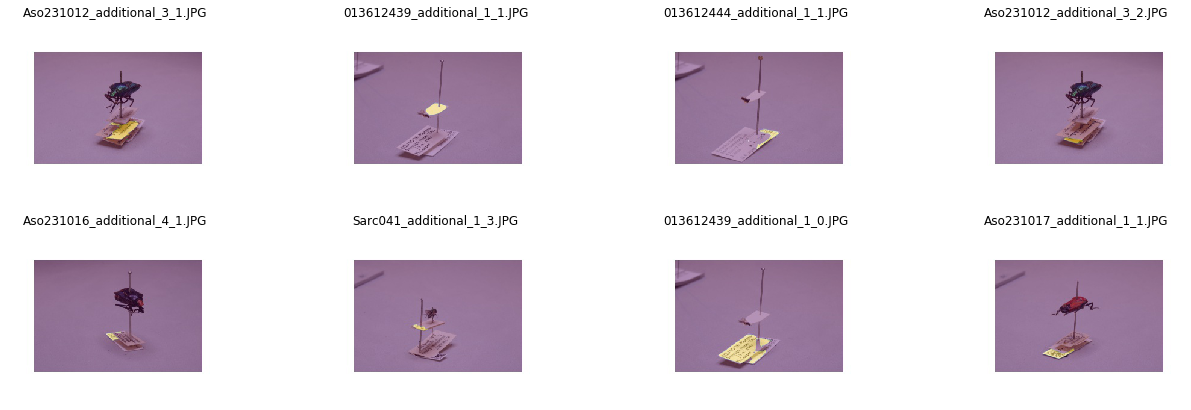

In [57]:
a = 2
b = 4
fig,ax = plt.subplots(a,b,figsize=(b*5.5,a*3.5))
j = 0
for i_,nm in enumerate(bad_random):
    i = i_%a
    if (i == 0) and (i_ != 0):
        j = j+1
    image = skimage.io.imread('results//plots//all/'+nm)
    ax[i,j].imshow(image)
    ax[i,j].axis('off')
    ax[i,j].set_title(nm)        

### Merged Labels
__Issue__: Mask covering multiple labels.

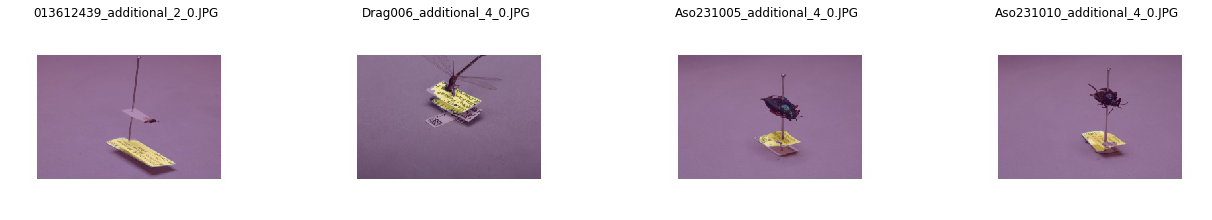

In [62]:
example_files = ['013612439_additional_2_0.JPG','Drag006_additional_4_0.JPG',
                 'Aso231005_additional_4_0.JPG','Aso231010_additional_4_0.JPG']

n = len(example_files)
fig,ax = plt.subplots(1,n,figsize=(n*5.5,3.5))
for i,nm in enumerate(example_files):
    image = skimage.io.imread('results//plots//all/'+nm)
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title(nm)    

### Incomplete Masks
__Issue__: Masks not fully covering a label.

__Solution__: Use mask as _rough guide_ and approximate label rectangle using the interpolation algorithm created (originally) for the alignment step.

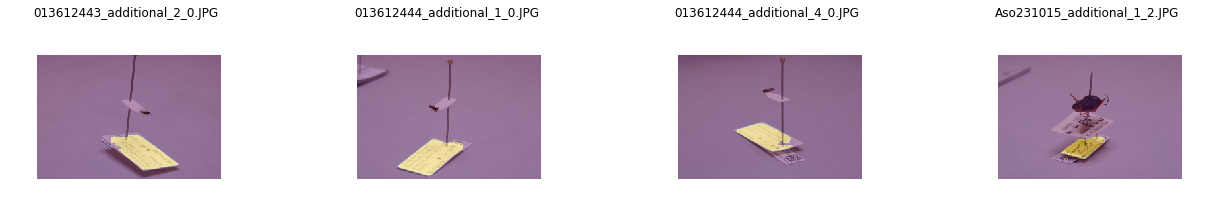

In [63]:
example_files = ['013612443_additional_2_0.JPG','013612444_additional_1_0.JPG','013612444_additional_4_0.JPG',
 'Aso231015_additional_1_2.JPG']

n = len(example_files)
fig,ax = plt.subplots(1,n,figsize=(n*5.5,3.5))
for i,nm in enumerate(example_files):
    image = skimage.io.imread('results//plots//all/'+nm)
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title(nm)   